# Análisis de la eficiencia y efectividad de los Lanzamientos
# de los Cy Youngs (2020-2021)

In [399]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher

In [400]:
matplotlib inline

In [401]:
from ipywidgets import interact, interactive, fixed, interact_manual,Button, HBox, VBox
import ipywidgets as widgets


## Selección y descarga de datos seleccionados (fuente:Statscast - scrap:pybaseball)

In [402]:
list_pitchers = ['trevor-bauer','shane-bieber','robbie-Ray', 'corbin-burnes']
seasons = ['2021-04-01/2021-09-03','2020-07-23/2020-09-27']

In [403]:
#original
@widgets.interact_manual( pitchers = list(list_pitchers) , seasons = list(seasons)
                 )

def f(pitcher=pitchers, season=seasons):
    
    key=playerid_lookup(pitcher.split('-')[1], pitcher.split('-')[0])['key_mlbam'].iloc[0]
    
    return key, season
    
ps = f.widget.out

interactive(children=(Dropdown(description='pitcher', options=('trevor-bauer', 'shane-bieber', 'robbie-Ray', '…

In [404]:
p=widgets.Dropdown(
    options=list_pitchers,
    value=list_pitchers[0],
    description='Pitcher:',
    disabled=False,
)
s=widgets.Dropdown(
    options=seasons,
    value=seasons[0],
    description='Season:',
    disabled=False,
)
display(p)
display(s)


Dropdown(description='Pitcher:', options=('trevor-bauer', 'shane-bieber', 'robbie-Ray', 'corbin-burnes'), valu…

Dropdown(description='Season:', options=('2021-04-01/2021-09-03', '2020-07-23/2020-09-27'), value='2021-04-01/…

In [413]:
key = playerid_lookup(p.value.split('-')[1], p.value.split('-')[0])['key_mlbam'].iloc[0]
player = statcast_pitcher(s.value.split('/')[0],s.value.split('/')[1], key)
player.head(5)

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-06-13,93.0,-1.30,5.50,"Bieber, Shane",641487,669456,single,hit_into_play,...,0,5,0,5,0,Strategic,Standard,214.0,-0.002,0.091
1,FF,2021-06-13,93.0,-1.40,5.48,"Bieber, Shane",641487,669456,NaN,foul,...,0,5,0,5,0,Strategic,Standard,213.0,0.000,0.000
2,FF,2021-06-13,92.5,-1.29,5.50,"Bieber, Shane",641487,669456,NaN,ball,...,0,5,0,5,0,Strategic,Standard,212.0,0.000,0.043
3,KC,2021-06-13,83.4,-1.27,5.50,"Bieber, Shane",641487,669456,NaN,foul_tip,...,0,5,0,5,0,Standard,Standard,24.0,0.000,-0.028
4,FF,2021-06-13,91.8,-1.33,5.51,"Bieber, Shane",641487,669456,NaN,ball,...,0,5,0,5,0,Standard,Standard,218.0,0.000,0.020


In [414]:
dd = player

#ajuste a formato válido de formato de fecha
dd['game_date'] = dd['game_date'].astype('datetime64[ns]')

# clean data
dd_clean=dd.drop(dd[dd['pitch_type'].isna()].index)
print('data antes del clean', dd.shape[0]) 
print('data despues del clean', dd_clean.shape[0])


data antes del clean 1475
data despues del clean 1475


In [415]:
dd_clean.head(2)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-06-13,93.0,-1.3,5.50,"Bieber, Shane",641487,669456,single,hit_into_play,...,0,5,0,5,0,Strategic,Standard,214.0,-0.002,0.091
1,FF,2021-06-13,93.0,-1.4,5.48,"Bieber, Shane",641487,669456,NaN,foul,...,0,5,0,5,0,Strategic,Standard,213.0,0.000,0.000


## Distribución de los Lanzamientos

<AxesSubplot:title={'center':'Distribución por Tipo de Resultado'}, ylabel='type'>

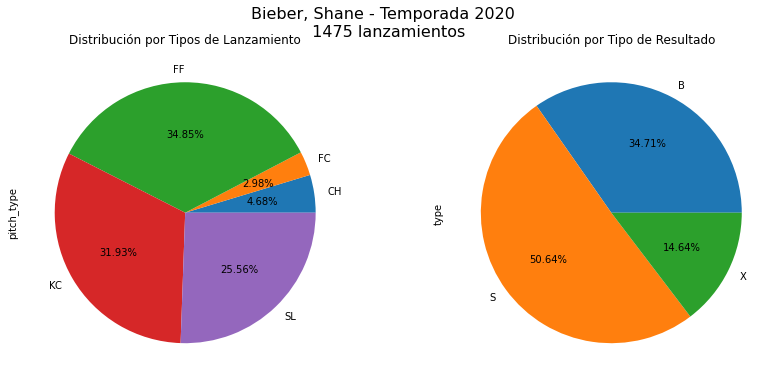

In [416]:
fig0, axes0 = plt.subplots(1,2,figsize=(14, 6))
fig0.suptitle( '{} - Temporada 2020 \n {:d} lanzamientos'. format( dd_clean.player_name[0], dd_clean.groupby('type')['type'].count().sum() ),fontsize=16)

dd_clean.groupby('pitch_type')['pitch_type'].count().plot.pie(title='Distribución por Tipos de Lanzamiento',
                                                    ax=axes0[0],autopct='%1.2f%%')

dd_clean.groupby('type')['type'].count().plot.pie(title='Distribución por Tipo de Resultado', ax=axes0[1],autopct='%1.2f%%')


## Distribución de Velocidades por Tipo de Lanzamiento

In [417]:
#indexado por fecha de los juegos
index_games= dd_clean.groupby(dd_clean['game_date']).sum().index

#definición de columnas de interés
tipos_lanzamientos = dd_clean.groupby('pitch_type')['pitch_type'].count().index #CU, FF, SL, etc
tipos_eventos = dd_clean.groupby('events')['events'].count().index        # Anotación Oficial: Single, Double, walk, K, etc
tipos_batazos = dd_clean.groupby('bb_type')['bb_type'].count().index      # fly_ball, ground_ball, etc


Text(0.5, 1.0, 'Spray Chart')

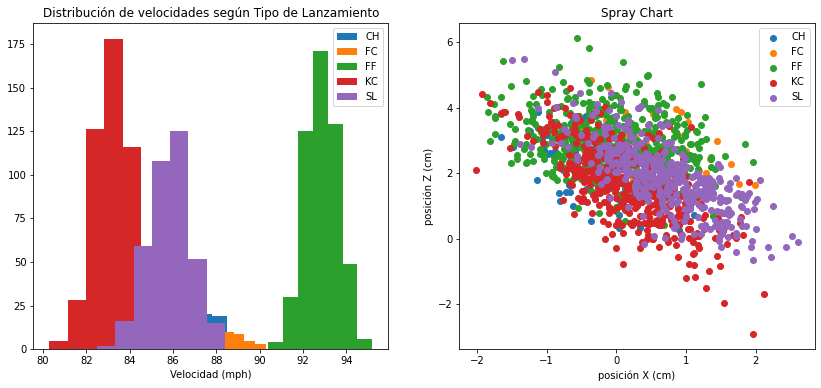

In [418]:
fig, axs = plt.subplots(1,2,figsize=(14, 6))

for tipo in tipos_lanzamientos:
    axs[0].hist(dd_clean[dd_clean['pitch_type']==tipo].release_speed,7, label=tipo)
    axs[1].scatter(dd_clean[dd_clean['pitch_type']==tipo].plate_x,dd_clean[dd_clean['pitch_type']==tipo].plate_z, label=tipo)

axs[0].legend()
axs[0].set_xlabel('Velocidad (mph)')
axs[0].set_title('Distribución de velocidades según Tipo de Lanzamiento')

axs[1].legend()
axs[1].set_xlabel('posición X (cm)')
axs[1].set_ylabel('posición Z (cm)')
axs[1].set_title('Spray Chart')

## Análisis de los Lanzamientos conectados por los bateadores

Text(0.5, 1.0, 'Tipo de Conexion \n por Tipo de Lanzamiento')

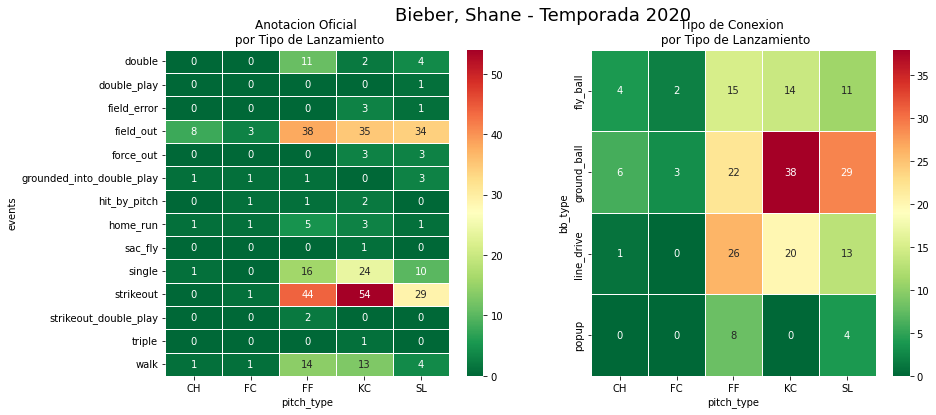

In [419]:

# Anotación Oficial (eventos) por Tipo de Lanzamiento
dm = pd.DataFrame(columns=tipos_lanzamientos,index=tipos_eventos)
for tl in tipos_lanzamientos:
    g=dd_clean[dd_clean['pitch_type']==tl]
    for te in tipos_eventos:
        dm.loc[te,tl]=float(g[g['events']==te].shape[0])
dm = dm.apply(pd.to_numeric)

# Tipo de conexión (o batazo) por Tipo de Lanzamiento
df = pd.DataFrame(columns=tipos_lanzamientos,index=tipos_batazos)
for tl in tipos_lanzamientos:
    d=dd_clean[dd_clean['pitch_type']==tl]
    for tb in tipos_batazos:
        df.loc[tb,tl]=float(d[d['bb_type']==tb].shape[0])
df = df.apply(pd.to_numeric)

# Graficas de los data frames dm y df
fig1, axes1 = plt.subplots(1,2,figsize=(14, 6))
fig1.suptitle('{} - Temporada 2020'. format(dd_clean.player_name[0]), fontsize=18)

sns.heatmap(dm,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes1[0])
sns.heatmap(df,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes1[1])

axes1[0].set_title('Anotacion Oficial \n por Tipo de Lanzamiento')
axes1[1].set_title('Tipo de Conexion \n por Tipo de Lanzamiento')

## Un widget para interactuar con los:
## 1. tipos de batazos recibidos, 2. tipos de resultados y  3. Anotación oficial 

In [420]:
@widgets.interact_manual(tipoLanzamiento = list(tipos_lanzamientos.values), TB = list(tipos_batazos.values) )

def pieResult(tipoLanzamiento='SL',TB ='fly_ball'):
    
    fig2, axes2 = plt.subplots(1,2,figsize=(14, 6))
    fig2.suptitle('{} - Temporada 2020'. format(dd_clean.player_name[0]), fontsize=18)
    
    sns.heatmap(df,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes2[0])
    
    #tipoLanzamiento = vals[0].value
    #TB = vals[1].value
    
    dm = dd_clean[(dd_clean['pitch_type']==tipoLanzamiento) & (dd_clean['bb_type']==TB)]
    dm.groupby('events')['events'].count().plot.pie(title='titulo',
                                                    ax=axes2[1],autopct='%1.2f%%')
    
    axes2[0].set_title('Lanzamientos conectados por bateadores: {:d}'. format(int( df.sum().sum()) ) )
    axes2[1].set_title('Distribución (por Anotación Oficial) de los {:d} {} que resultaron en {}'. format( int( df.loc[TB,tipoLanzamiento]), tipoLanzamiento, TB ) )
    

interactive(children=(Dropdown(description='tipoLanzamiento', index=4, options=('CH', 'FC', 'FF', 'KC', 'SL'),…